# Quick Start

## Access stellar model grid data

In [1]:
from isochrones.mist import MISTIsochroneGrid

grid = MISTIsochroneGrid()
print(len(grid.df))
grid.df.head()  # Just the first few rows

1494453


eep  age       feh      mass  initial_mass  \
log10_isochrone_age_yr feh  EEP                                               
5.0                    -4.0 35    35  5.0 -3.978406  0.100000      0.100000   
                            36    36  5.0 -3.978406  0.102885      0.102885   
                            37    37  5.0 -3.978406  0.107147      0.107147   
                            38    38  5.0 -3.978406  0.111379      0.111379   
                            39    39  5.0 -3.978406  0.115581      0.115581   

                                   radius   density   logTeff         Teff  \
log10_isochrone_age_yr feh  EEP                                              
5.0                    -4.0 35   1.106082  0.104184  3.617011  4140.105252   
                            36   1.122675  0.102507  3.618039  4149.909661   
                            37   1.147702  0.099921  3.619556  4164.436984   
                            38   1.173015  0.097287  3.621062  4178.903372   
                            39   1.198615  0.094627  3.622555  4193.289262   

                                     logg      logL      Mbol   delta_nu  \
log10_isochrone_age_yr feh  EEP                                            
5.0                    -4.0 35   3.350571 -0.489734  5.964335  37.987066   
                            36   3.347798 -0.472691  5.921728  37.739176   
                            37   3.343658 -0.447471  5.858678  37.345115   
                            38   3.339612 -0.422498  5.796244  36.923615   
                            39   3.335660 -0.397776  5.734440  36.473151   

                                     nu_max  phase   dm_deep  
log10_isochrone_age_yr feh  EEP                               
5.0                    -4.0 35   299.346079   -1.0  0.002885  
                            36   298.570836   -1.0  0.003573  
                            37   297.180748   -1.0  0.004247  
                            38   295.526946   -1.0  0.004217  
                            39   293.589960   -1.0  0.004189

In [2]:
from isochrones.mist import MISTEvolutionTrackGrid

grid_tracks = MISTEvolutionTrackGrid()
print(len(grid_tracks.df))
grid_tracks.df.head()

3619652


nu_max      logg  eep  initial_mass  \
initial_feh initial_mass EEP                                            
-4.0        0.1          1    143.524548  3.033277  1.0           0.1   
                         2    145.419039  3.038935  2.0           0.1   
                         3    147.409881  3.044805  3.0           0.1   
                         4    149.499346  3.050886  4.0           0.1   
                         5    151.703570  3.057203  5.0           0.1   

                                radius   logTeff  mass   density      Mbol  \
initial_feh initial_mass EEP                                                 
-4.0        0.1          1    1.593804  3.620834   0.1  0.034823  5.132871   
                         2    1.583455  3.620769   0.1  0.035510  5.147664   
                         3    1.572790  3.620702   0.1  0.036237  5.163015   
                         4    1.561817  3.620631   0.1  0.037006  5.178922   
                         5    1.550499  3.620558   0.1  0.037823  5.195452   

                              phase       feh         Teff      logL  \
initial_feh initial_mass EEP                                           
-4.0        0.1          1     -1.0 -3.978406  4176.707371 -0.157148   
                         2     -1.0 -3.978406  4176.085183 -0.163066   
                         3     -1.0 -3.978406  4175.435381 -0.169206   
                         4     -1.0 -3.978406  4174.757681 -0.175569   
                         5     -1.0 -3.978406  4174.049081 -0.182181   

                               delta_nu  interpolated      star_age       age  \
initial_feh initial_mass EEP                                                    
-4.0        0.1          1    21.776686         False  13343.289397  4.125263   
                         2    21.993078         False  14171.978264  4.151430   
                         3    22.219791         False  15048.910447  4.177505   
                         4    22.457004         False  15975.827275  4.203463   
                         5    22.706349         False  16962.744747  4.229496   

                               dt_deep  
initial_feh initial_mass EEP            
-4.0        0.1          1    0.026168  
                         2    0.026121  
                         3    0.026016  
                         4    0.025996  
                         5    0.025996

## Interpolate stellar properites

In [3]:
from isochrones import get_ichrone
mist = get_ichrone('mist')
eep = mist.get_eep(1.01, 9.76, 0.03, accurate=True)
mist.interp_value([eep, 9.76, 0.03], ['Teff', 'logg', 'radius', 'density'])

array([5.86016011e+03, 4.36634798e+00, 1.09151255e+00, 1.09589730e+00])

In [4]:
mist.interp_mag([eep, 9.76, 0.03, 200, 0.1], bands=['G', 'BP', 'RP'])

(5860.16011294621,
 4.366347981387894,
 -0.005536922088842331,
 array([10.99261956, 11.3150264 , 10.50313434]))

## Generate synthetic properties of stars 

In [5]:
from isochrones import get_ichrone
tracks = get_ichrone('mist', tracks=True)

mass, age, feh = (1.03, 9.72, -0.11)

tracks.generate(mass, age, feh, return_dict=True)  # "accurate=True" makes more accurate, but slower

{'nu_max': 2275.6902092679834,
 'logg': 4.315208279229787,
 'eep': 394.24,
 'initial_mass': 1.03,
 'radius': 1.1692076259176427,
 'logTeff': 3.785191265391399,
 'mass': 1.0297274169057322,
 'density': 0.9097687776092286,
 'Mbol': 4.162373757546131,
 'phase': 0.0,
 'feh': -0.19095007384845408,
 'Teff': 6100.263434973235,
 'logL': 0.23105049698154745,
 'delta_nu': 114.32933695055772,
 'interpolated': 0.0,
 'star_age': 5302578707.515498,
 'age': 9.722480201790624,
 'dt_deep': 0.0036558739980003118,
 'J': 3.2044197352759696,
 'H': 2.91756110497181,
 'K': 2.890399473719951,
 'G': 4.085847599912897,
 'BP': 4.349405878788243,
 'RP': 3.6587316339856084,
 'W1': 2.8807983122840044,
 'W2': 2.885550073210391,
 'W3': 2.8685709557487264,
 'TESS': 3.653543903981804,
 'Kepler': 4.004222279916473}

In [6]:
from isochrones.priors import ChabrierPrior
import numpy as np

# Simulate a 1000-star cluster at 8kpc

N = 1000
masses = ChabrierPrior().sample(N)
feh = -1.8
age = np.log10(6e9)  # 6 Gyr
distance = 8000.  # 8 kpc 
AV = 0.15

# By default this will return a dataframe
%timeit tracks.generate(masses, age, feh, distance=distance, AV=AV)
df = tracks.generate(masses, age, feh, distance=distance, AV=AV)

The slowest run took 158.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 9.04 ms per loop


In [7]:
df = df.dropna()
print(len(df)) # about half of the original simulated stars are nans
df.head()  

503


nu_max      logg         eep  initial_mass    radius   logTeff  \
0  10804.874097  4.914275  303.258462      0.418821  0.374324  3.631195   
1  21841.644652  5.197122  252.271094      0.150592  0.161974  3.583987   
7   2838.154305  4.435801  384.922283      0.849837  0.924219  3.833683   
8    180.963558  3.194705  490.813513      0.968456  4.116643  3.742612   
9   1931.725171  4.282014  416.535309      0.911882  1.142684  3.860309   

       mass    density       Mbol  phase    ...              H          K  \
0  0.418811  11.354937   8.178493    0.0    ...      20.662206  20.501401   
1  0.150591  50.030150  10.467041    0.0    ...      22.738821  22.531319   
7  0.849572   1.517288   4.187702    0.0    ...      17.866850  17.848031   
8  0.967435   0.019564   1.854663    2.0    ...      14.901613  14.851377   
9  0.911438   0.861278   3.460707    0.0    ...      17.332797  17.316050   

           G         BP         RP         W1         W2         W3  \
0  23.037457  23.718192  22.251047  20.363681  20.324516  20.219805   
1  25.488818  26.383334  24.589471  22.380110  22.316618  22.177299   
7  18.902509  19.108502  18.534769  17.834259  17.825916  17.803109   
8  16.530374  16.884757  15.996079  14.816213  14.800818  14.770045   
9  18.172883  18.341059  17.864912  17.304300  17.297109  17.275839   

        TESS     Kepler  
0  22.229761  22.950946  
1  24.559047  25.416412  
7  18.528245  18.837217  
8  15.985842  16.451727  
9  17.857626  18.111831  

[5 rows x 29 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
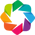

:Scatter   [BP-RP]   (G,mass,radius,Teff,logg,eep)

In [8]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas

df['BP-RP'] = df.BP - df.RP
df.hvplot.scatter('BP-RP', 'G', hover_cols=['mass', 'radius', 'Teff', 'logg', 'eep']).options(invert_yaxis=True, width=600)

## Fit physical parameters of a star to observed data

In [9]:
from isochrones import get_ichrone, SingleStarModel

mist = get_ichrone('mist', bands=['BP', 'RP'])
params = {'Teff': (5700, 100), 'logg': (4.5, 0.1), 'feh': (0.0, 0.15), 
          'BP': (10.42, 0.01), 'RP': (9.54, 0.01), 
          'parallax': (10, 0.5)}  # mas
mod = SingleStarModel(mist, **params)
mod.fit()

INFO:root:MultiNest basename: ./chains/mist-single-


In [10]:
%matplotlib inline

mod.corner_physical();

Check out the numerical sampling results:

In [11]:
mod.samples.describe()

eep          age          feh     distance           AV  \
count  4643.000000  4643.000000  4643.000000  4643.000000  4643.000000   
mean    337.710149     9.509309    -0.020312   101.801691     0.136494   
std       9.624071     0.149170     0.078899     3.989609     0.069615   
min     304.868138     9.043279    -0.300996    88.634174     0.000291   
25%     330.856377     9.400976    -0.070581    99.008511     0.085589   
50%     339.214747     9.526285    -0.022509   101.582447     0.129668   
75%     345.473042     9.630834     0.033488   104.310959     0.183091   
max     364.435350     9.802944     0.243018   118.737714     0.466537   

            lnprob  
count  4643.000000  
mean    -39.022183  
std       1.311924  
min     -48.789323  
25%     -39.612822  
50%     -38.744828  
75%     -38.076162  
max     -37.088602

And the derived parameters at those samples:

In [12]:
mod.derived_samples.describe()

eep          age          feh         mass  initial_mass  \
count  4643.000000  4643.000000  4643.000000  4643.000000   4643.000000   
mean    337.710149     9.509309    -0.018942     0.958078      0.958169   
std       9.624071     0.149170     0.086400     0.030418      0.030410   
min     304.868138     9.043279    -0.317669     0.876002      0.876104   
25%     330.856377     9.400976    -0.076201     0.936277      0.936370   
50%     339.214747     9.526285    -0.022622     0.956896      0.956970   
75%     345.473042     9.630834     0.039230     0.979404      0.979464   
max     364.435350     9.802944     0.267804     1.083840      1.083927   

            radius      density      logTeff         Teff         logg  \
count  4643.000000  4643.000000  4643.000000  4643.000000  4643.000000   
mean      0.921082     1.738516     3.755075  5690.649562     4.491137   
std       0.031022     0.137653     0.005747    75.536605     0.020924   
min       0.828304     1.209516     3.740466  5501.680997     4.396153   
25%       0.899485     1.643165     3.750771  5634.112958     4.476522   
50%       0.919331     1.740170     3.754596  5683.909988     4.492272   
75%       0.940155     1.832595     3.758868  5740.000379     4.506173   
max       1.058840     2.217147     3.782650  6062.846454     4.553723   

          ...              Mbol     delta_nu       nu_max   phase  \
count     ...       4643.000000  4643.000000  4643.000000  4643.0   
mean      ...          4.982881   157.087407  3538.322417     0.0   
std       ...          0.107383     6.095095   177.717410     0.0   
min       ...          4.568552   131.705546  2801.309165     0.0   
25%       ...          4.913786   152.933682  3412.744754     0.0   
50%       ...          4.985717   157.283081  3545.198779     0.0   
75%       ...          5.061043   161.294116  3664.317241     0.0   
max       ...          5.303972   177.056425  4130.359858     0.0   

           dm_deep       BP_mag       RP_mag     parallax     distance  \
count  4643.000000  4643.000000  4643.000000  4643.000000  4643.000000   
mean      0.008306    10.420067     9.539072     9.837970   101.801691   
std       0.000654     0.009287     0.009087     0.382167     3.989609   
min       0.002593    10.386946     9.505070     8.421924    88.634174   
25%       0.007966    10.413741     9.533035     9.586720    99.008511   
50%       0.008247    10.420135     9.539162     9.844220   101.582447   
75%       0.008619    10.426205     9.545132    10.100142   104.310959   
max       0.011076    10.453965     9.574724    11.282330   118.737714   

                AV  
count  4643.000000  
mean      0.136494  
std       0.069615  
min       0.000291  
25%       0.085589  
50%       0.129668  
75%       0.183091  
max       0.466537  

[8 rows x 21 columns]

Eyeball your posterior predictive with:

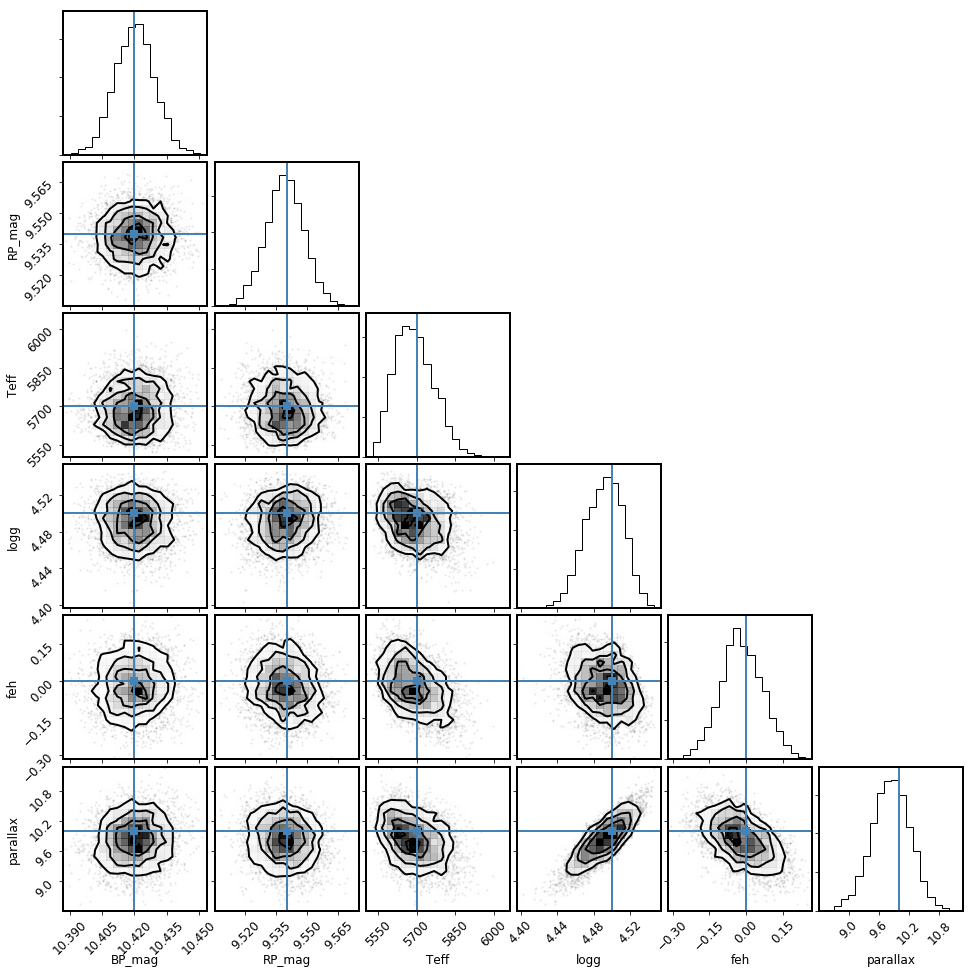

In [13]:
mod.corner_observed();

## Fit a binary star model

In [14]:
from isochrones import BinaryStarModel
mod2 = BinaryStarModel(mist, **params)

INFO:root:MultiNest basename: ./chains/mist-binary-


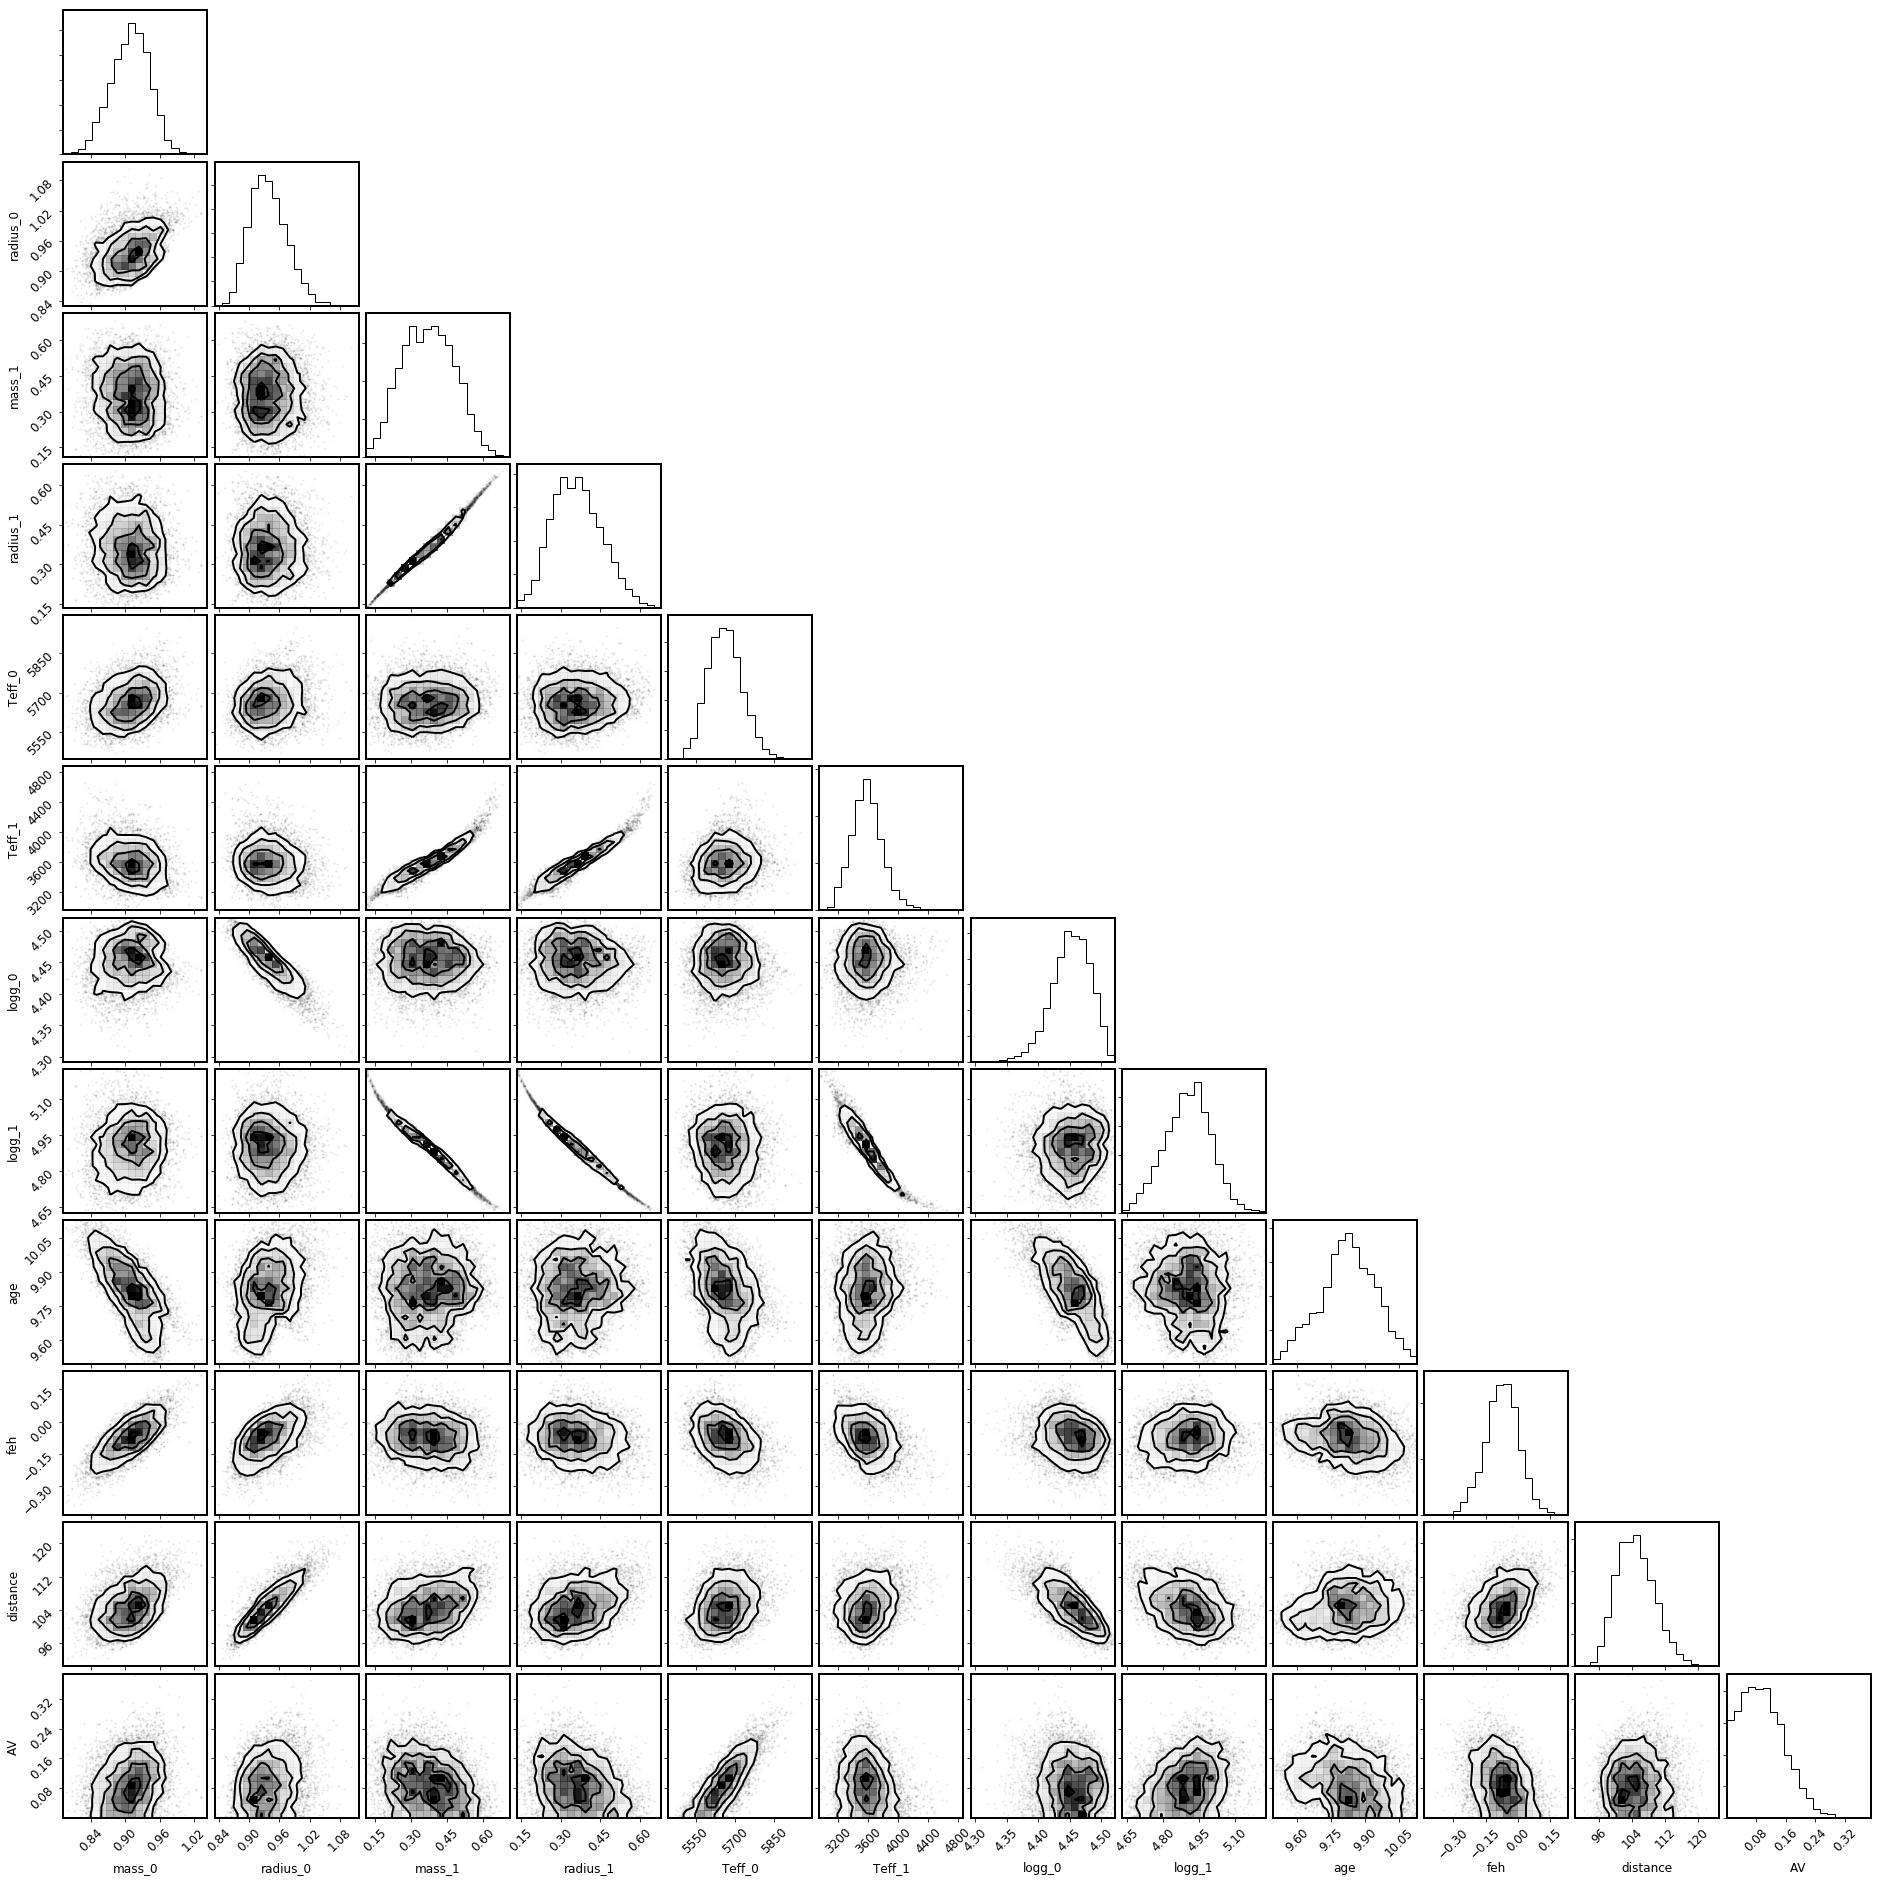

In [15]:
mod2.fit()
mod2.corner_physical();

In [16]:
mod2.derived_samples.head()

eep_0       eep_1        age       feh    distance        AV  \
0  359.086356  249.801089   9.821476 -0.073397   98.727349  0.178347   
1  398.209362  283.317080  10.067148 -0.280222  107.778948  0.088950   
2  389.035743  301.852188   9.971050 -0.207856  106.526665  0.166244   
3  397.668498  266.911796   9.915806 -0.109190  120.644797  0.249099   
4  370.982797  256.436383   9.816281 -0.205884  103.041704  0.385523   

      lnprob       eep_0     feh_0    mass_0    ...         Mbol_1  \
0 -54.808864  359.086356 -0.104045  0.902009    ...      10.367668   
1 -54.414634  398.209362 -0.372728  0.826538    ...       9.308760   
2 -54.189376  389.035743 -0.278190  0.869004    ...       9.014070   
3 -54.100849  397.668498 -0.176003  0.936127    ...       9.592630   
4 -53.934142  370.982797 -0.260589  0.914513    ...       9.905946   

   delta_nu_1      nu_max_1  phase_1  dm_deep_1   BP_mag_1   RP_mag_1  \
0  615.092182  16669.820345      0.0   0.006549  17.795078  15.260853   
1  463.937102  12708.865085      0.0   0.001280  16.173813  14.156854   
2  414.876808  11597.777825      0.0   0.002549  15.919824  13.882693   
3  486.986772  13422.770521      0.0   0.006254  17.143644  14.860496   
4  562.841780  15244.528561      0.0   0.007484  17.169701  14.890180   

      BP_mag    RP_mag   parallax  
0  10.463678  9.547117  10.128906  
1  10.414967  9.566663   9.278250  
2  10.391647  9.518239   9.387321  
3  10.432474  9.553840   8.288795  
4  10.439209  9.511726   9.704808  

[5 rows x 44 columns]

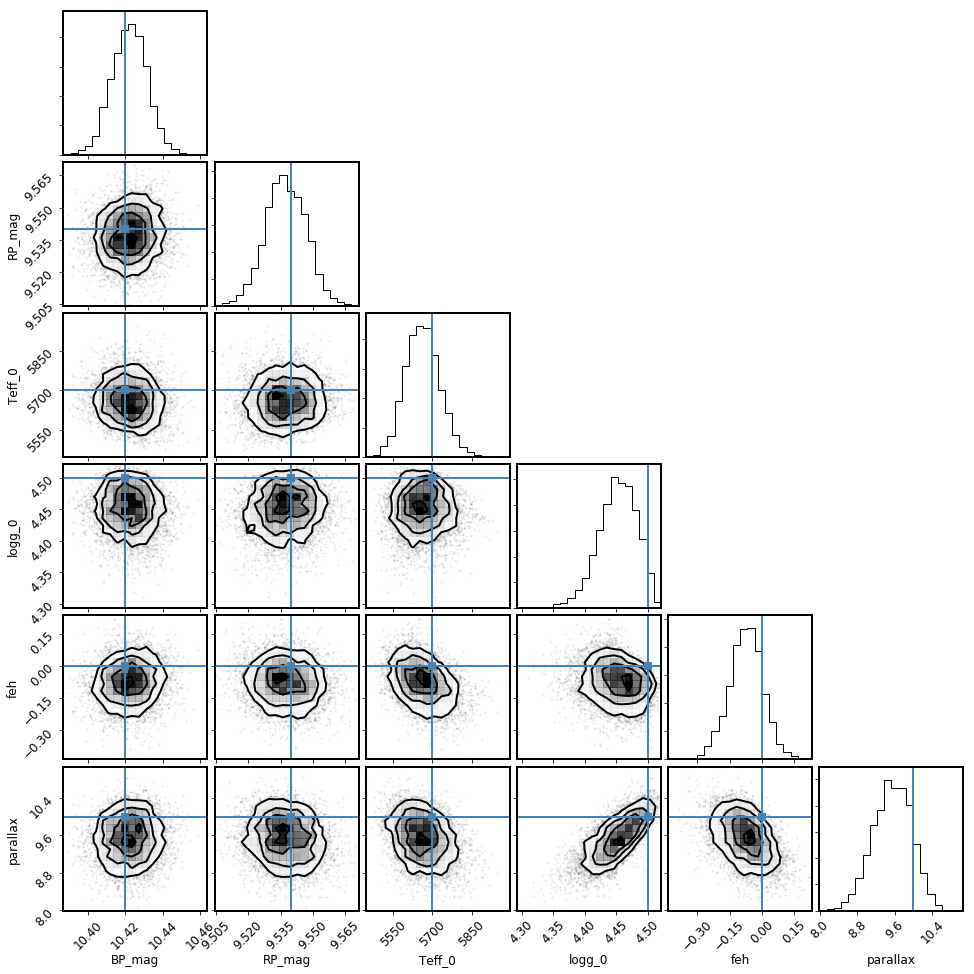

In [17]:
mod2.corner_observed();